# Initial Data Exploration

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load raw data from CSV files specified in the directory structure
def load_data():
    home = os.path.expanduser("~")
    data_dir = os.path.join(
        home,
        "Documents",
        "data analytics",
        "Data-Analytics-and-Learning-Methods",
        "data",
        "raw"
        
    )
    
    data = {}
    # Walk through all subfolders under raw
    for root, _, files in os.walk(data_dir):
        for file_name in files:
            if file_name.endswith(".csv"):
                file_path = os.path.join(root, file_name)
                try:
                    df = pd.read_csv(file_path, skipinitialspace=True)  # handles spaces
                    if df.empty:
                        print(f"Skipping {file_name}: empty file")
                        continue
                    df.columns = df.columns.str.strip()  # clean headers
                    # Use folder name + file name as key so you know which run it belongs to
                    relative_path = os.path.relpath(file_path, data_dir)
                    data[relative_path] = df
                except Exception as e:
                    print(f"Could not load {file_name}: {e}")
    return data

if __name__ == "__main__":
    datasets = load_data()
    for name, df in datasets.items():
        print(f"Loaded {name} with shape {df.shape}")

Could not load Annotation.csv: No columns to parse from file
Could not load Annotation.csv: No columns to parse from file
Could not load Annotation.csv: No columns to parse from file
Could not load Annotation.csv: No columns to parse from file
Could not load Annotation.csv: No columns to parse from file
Could not load Annotation.csv: No columns to parse from file
Could not load Annotation.csv: No columns to parse from file
Loaded running_1_ozde\Accelerometer.csv with shape (9950, 5)
Loaded running_1_ozde\AccelerometerUncalibrated.csv with shape (9951, 5)
Loaded running_1_ozde\Gravity.csv with shape (9950, 5)
Loaded running_1_ozde\Gyroscope.csv with shape (9950, 5)
Loaded running_1_ozde\GyroscopeUncalibrated.csv with shape (9951, 5)
Loaded running_1_ozde\Metadata.csv with shape (1, 11)
Loaded running_2_ozde\Accelerometer.csv with shape (10277, 5)
Loaded running_2_ozde\AccelerometerUncalibrated.csv with shape (10279, 5)
Loaded running_2_ozde\Gravity.csv with shape (10277, 5)
Loaded runni

Could not load Annotation.csv: No columns to parse from file
Could not load Annotation.csv: No columns to parse from file
Could not load Annotation.csv: No columns to parse from file
Could not load Annotation.csv: No columns to parse from file
Could not load Annotation.csv: No columns to parse from file
Could not load Annotation.csv: No columns to parse from file
Could not load Annotation.csv: No columns to parse from file
Loaded running_1_ozde\Accelerometer.csv with shape (9950, 5)
Loaded running_1_ozde\AccelerometerUncalibrated.csv with shape (9951, 5)
Loaded running_1_ozde\Gravity.csv with shape (9950, 5)
Loaded running_1_ozde\Gyroscope.csv with shape (9950, 5)
Loaded running_1_ozde\GyroscopeUncalibrated.csv with shape (9951, 5)
Loaded running_1_ozde\Metadata.csv with shape (1, 11)
Loaded running_2_ozde\Accelerometer.csv with shape (10277, 5)
Loaded running_2_ozde\AccelerometerUncalibrated.csv with shape (10279, 5)
Loaded running_2_ozde\Gravity.csv with shape (10277, 5)
Loaded runni

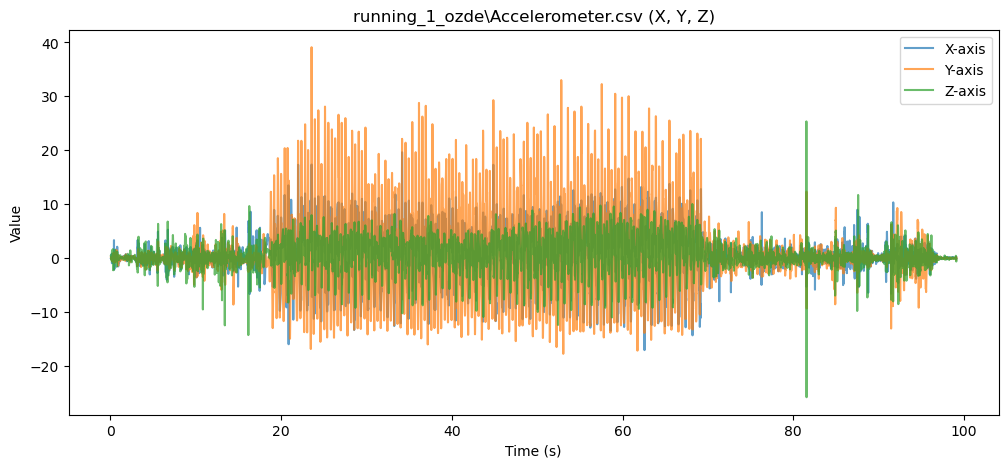

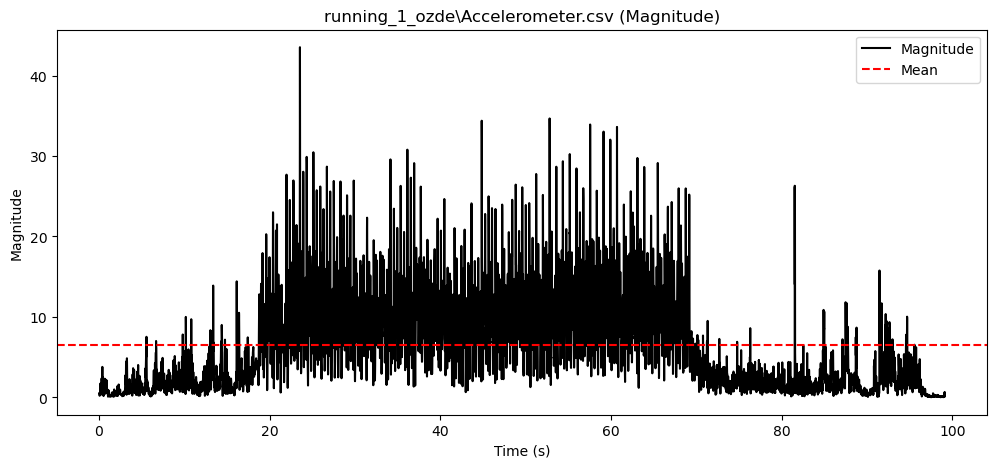

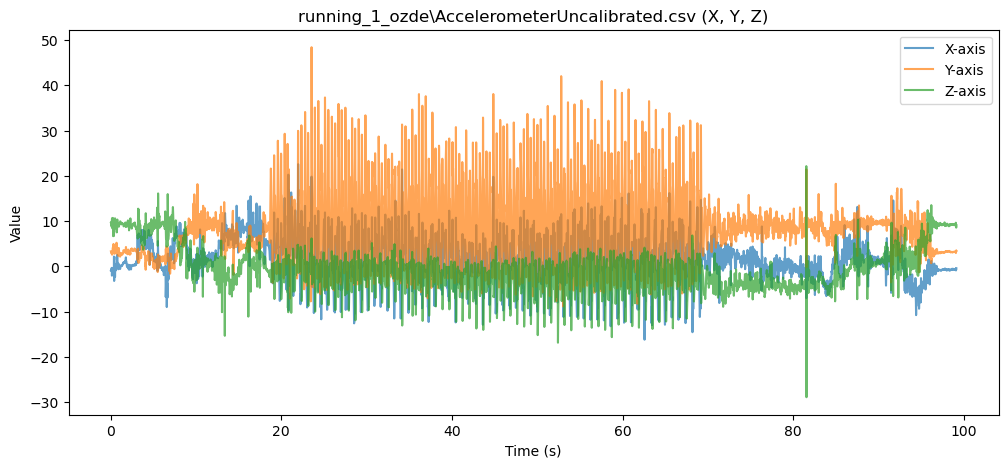

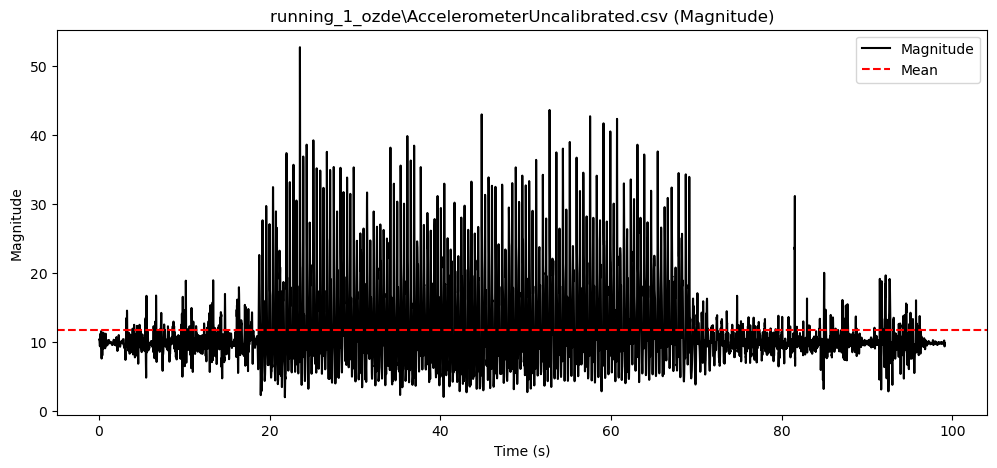

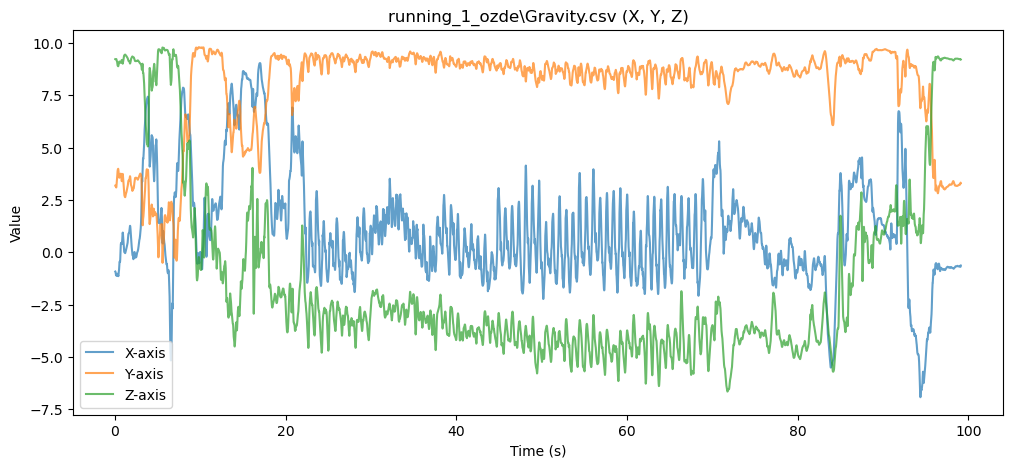

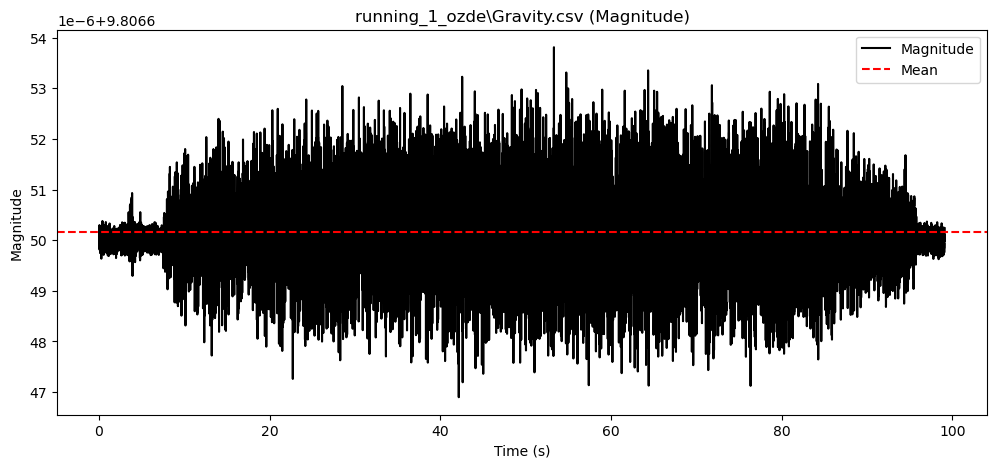

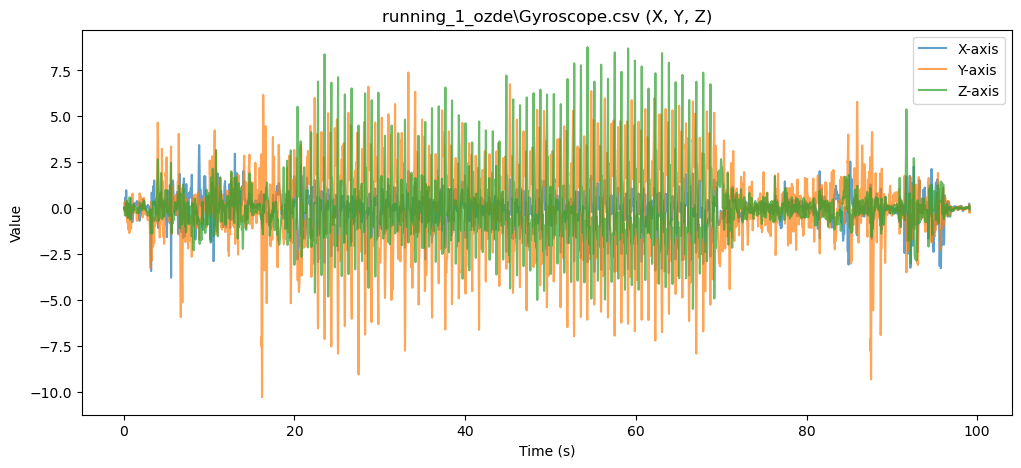

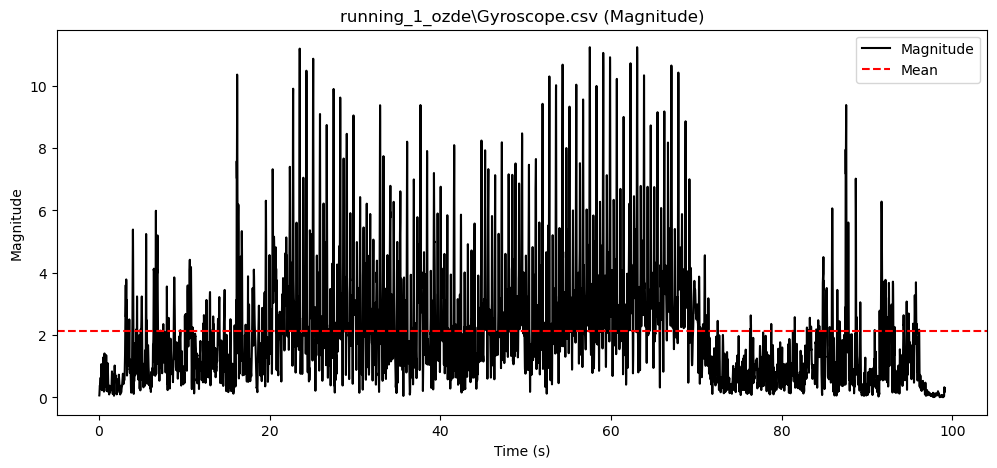

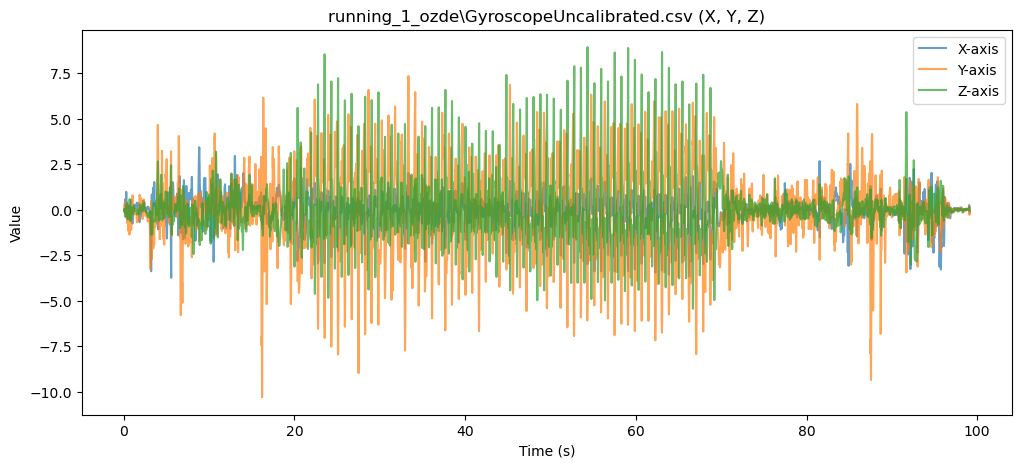

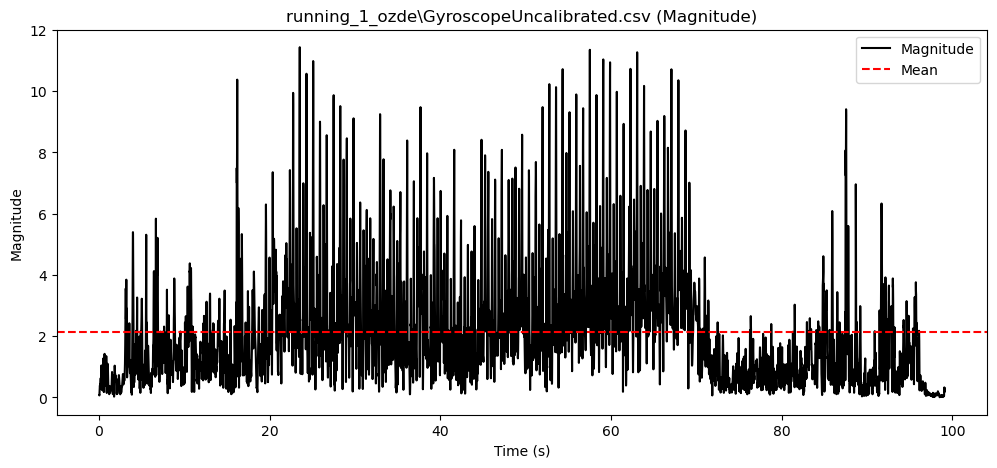

Skipping running_1_ozde\Metadata.csv: missing required columns


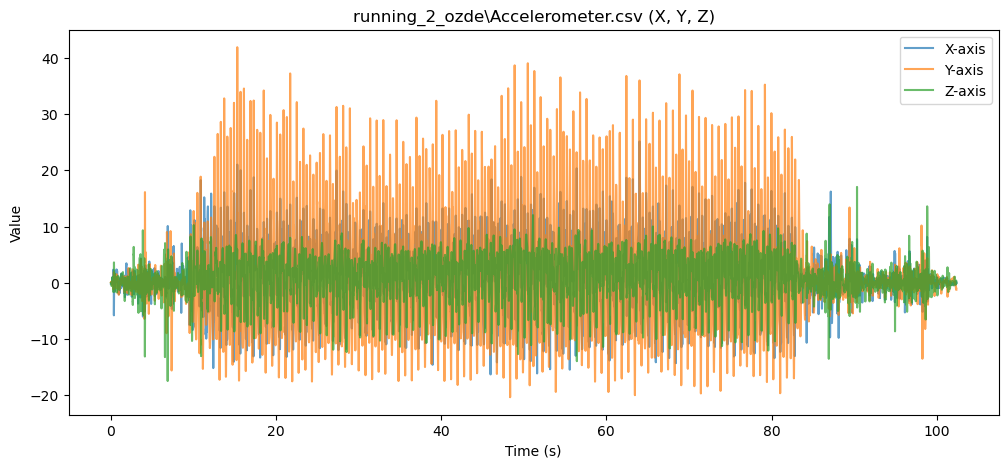

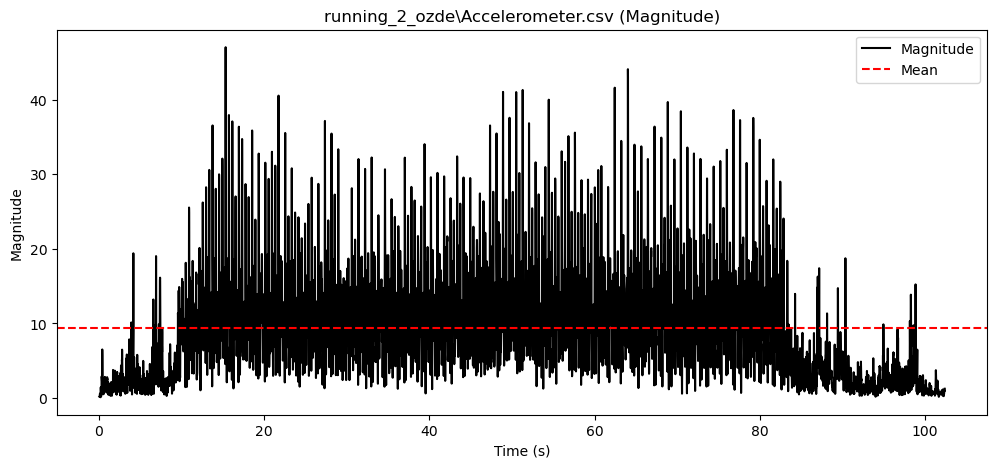

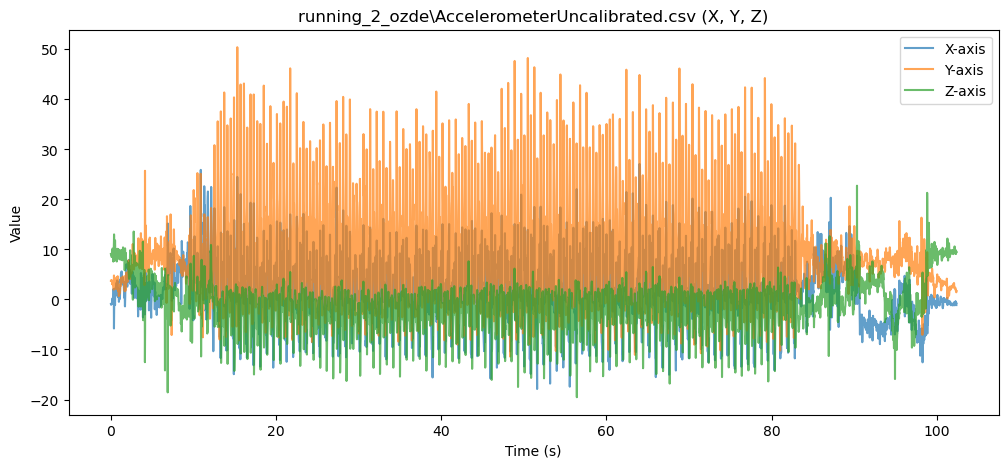

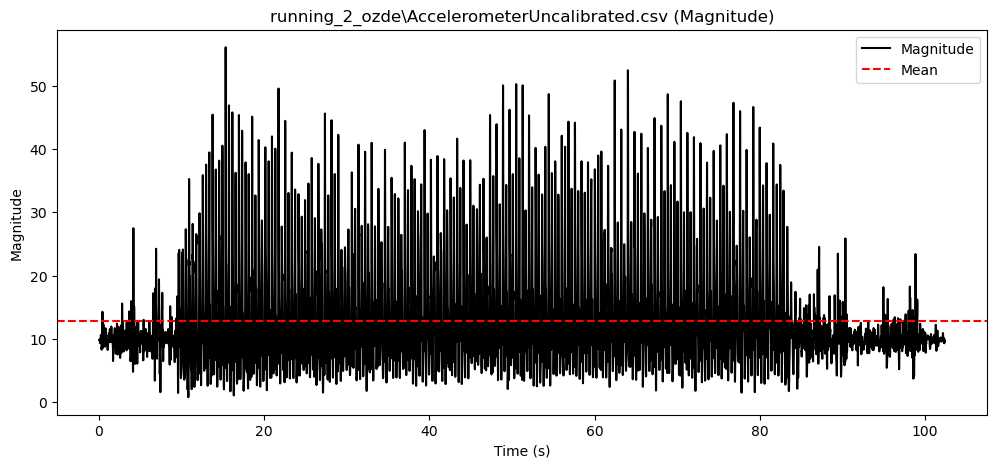

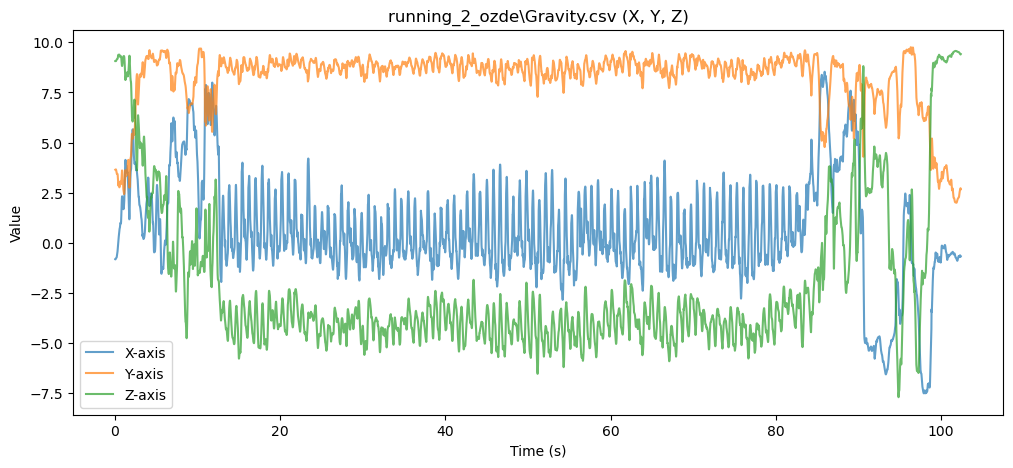

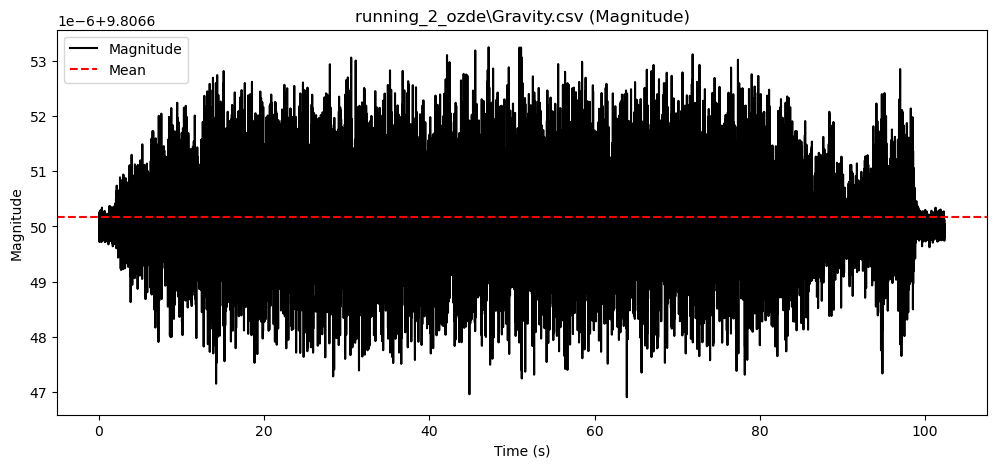

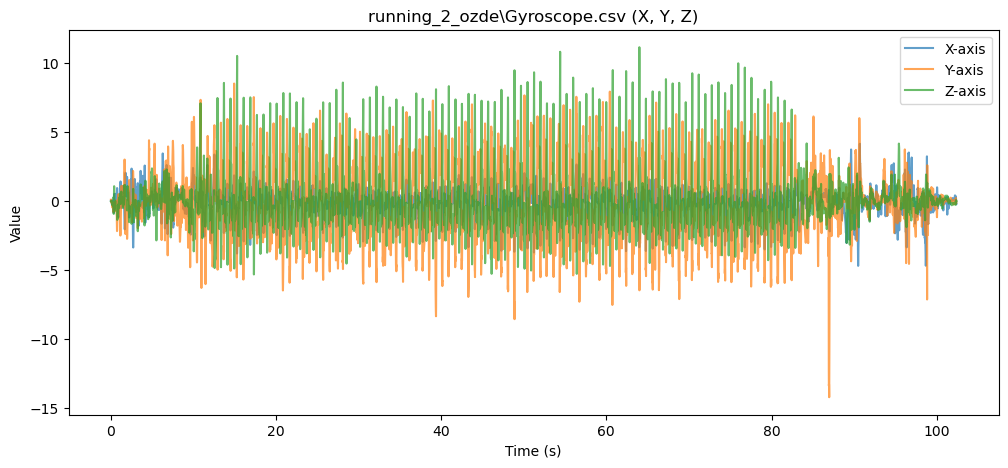

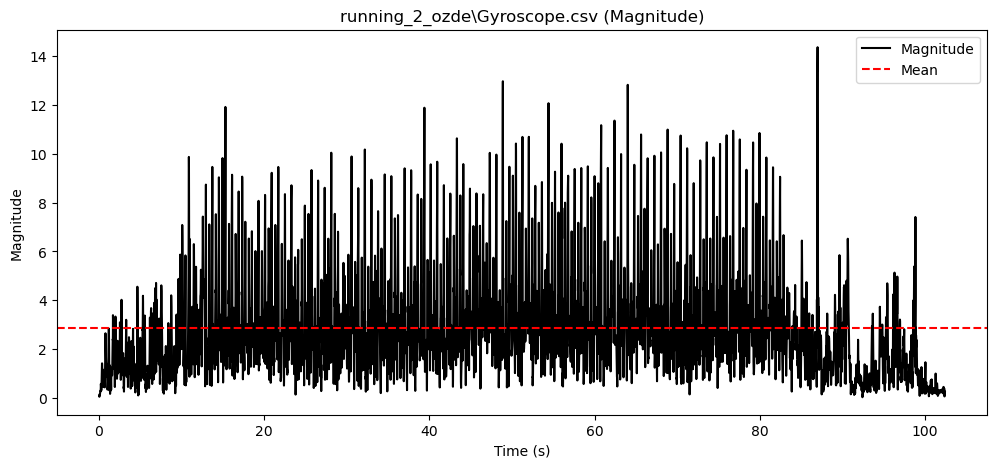

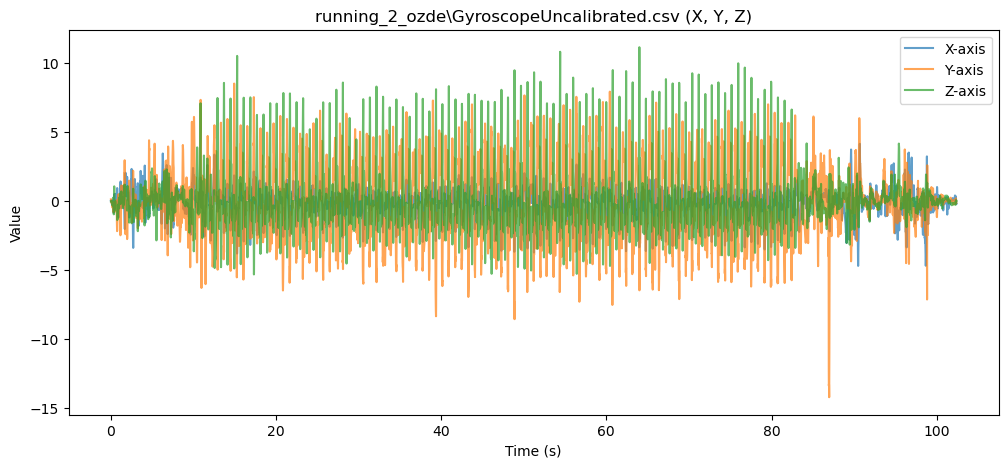

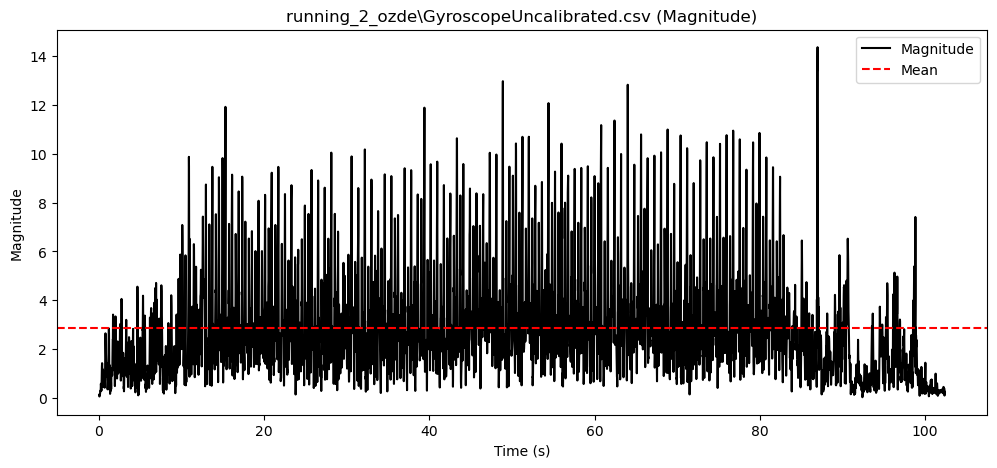

Skipping running_2_ozde\Metadata.csv: missing required columns


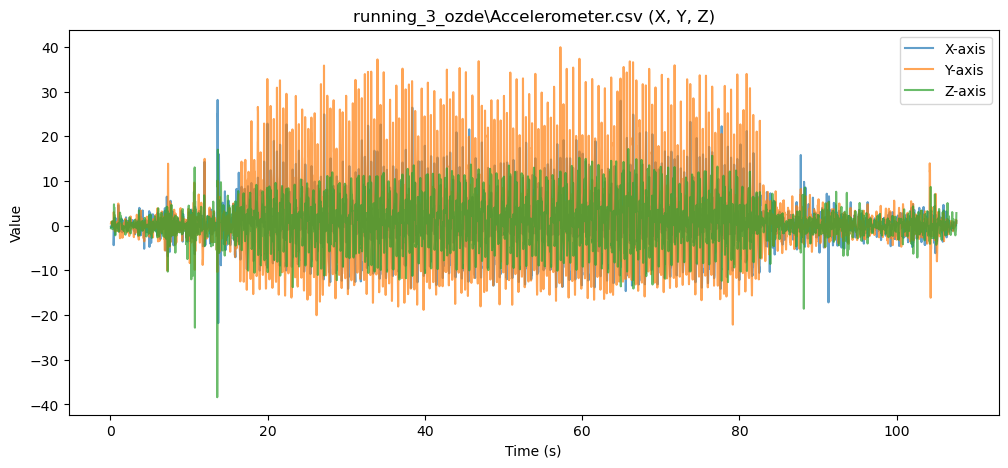

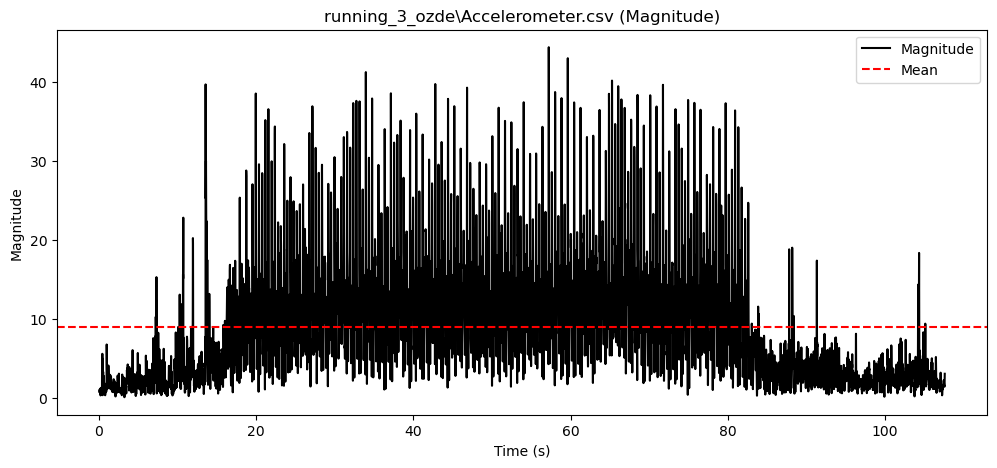

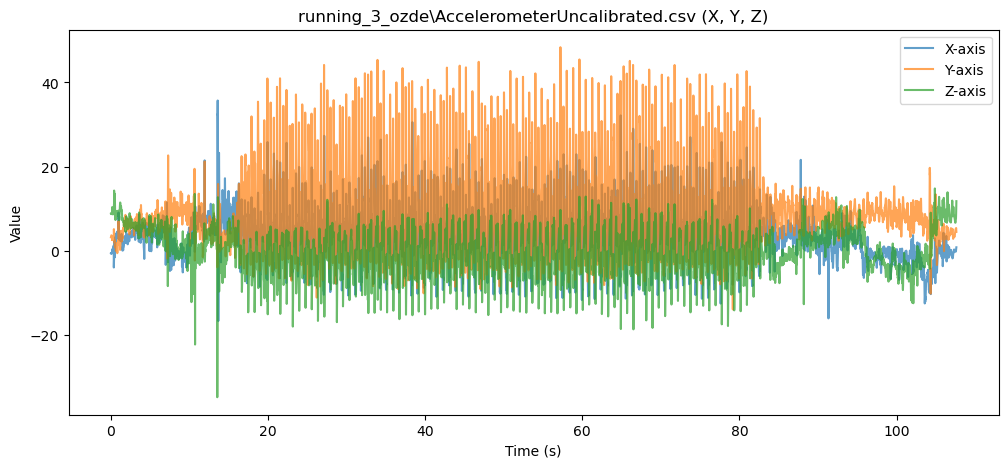

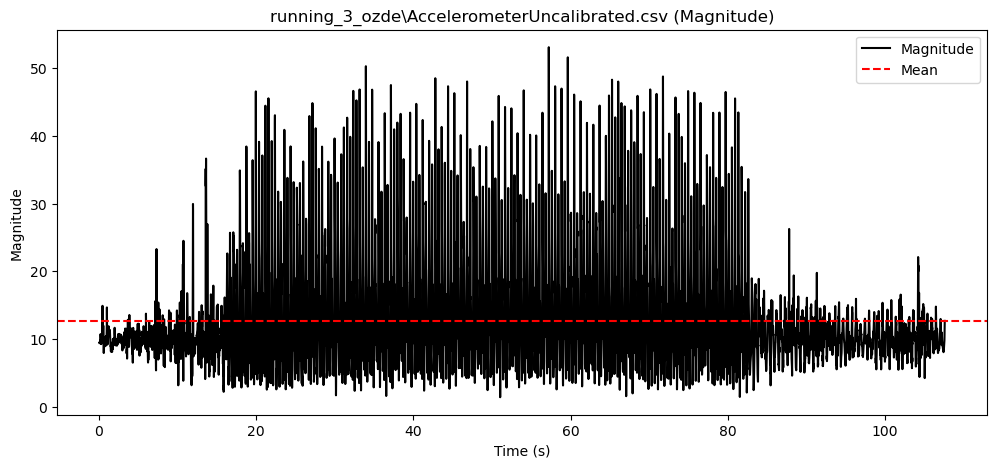

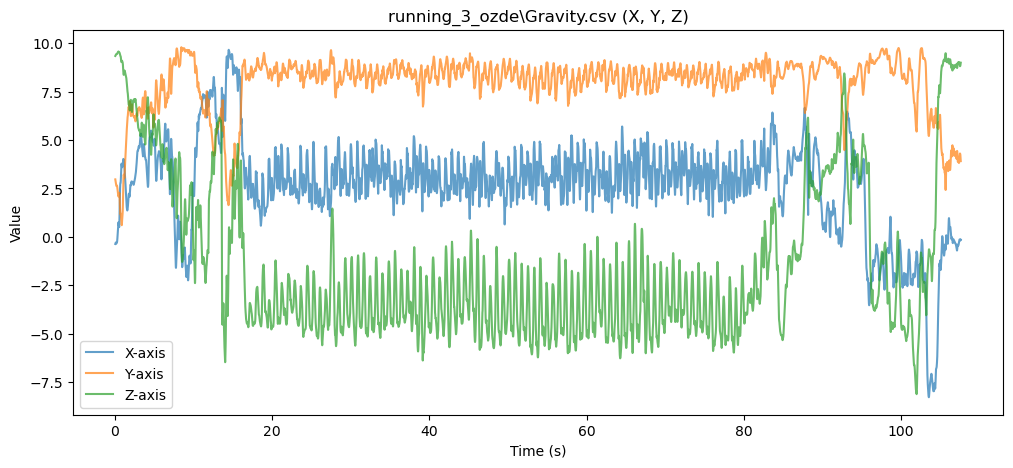

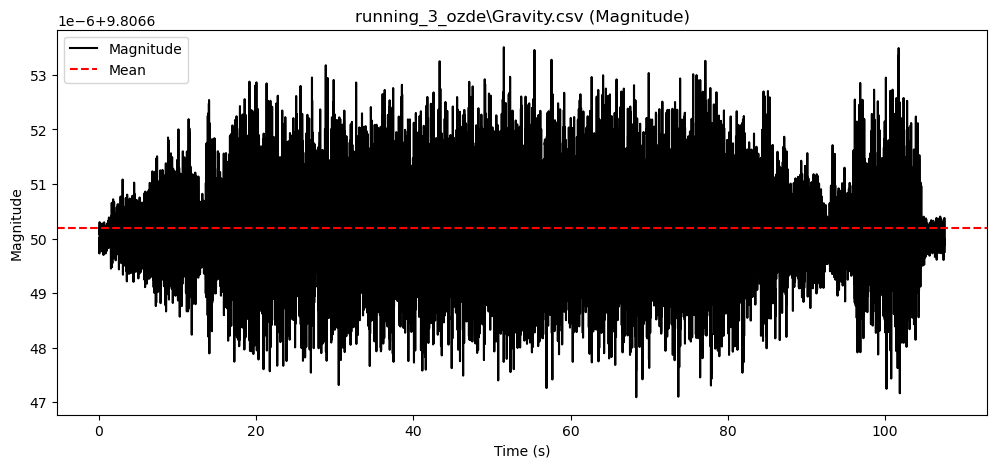

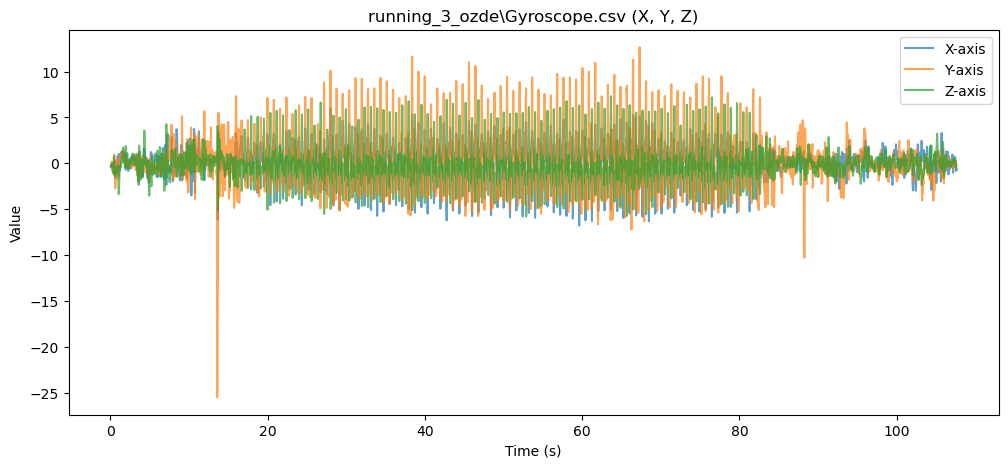

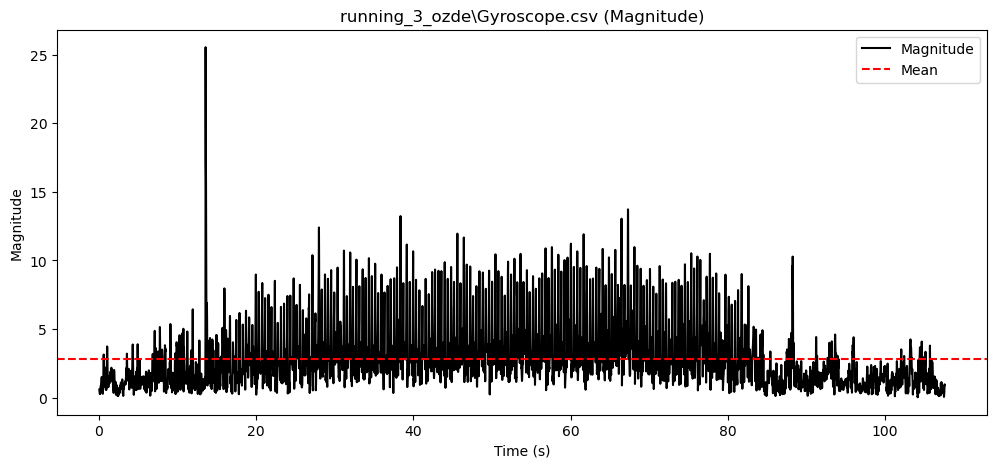

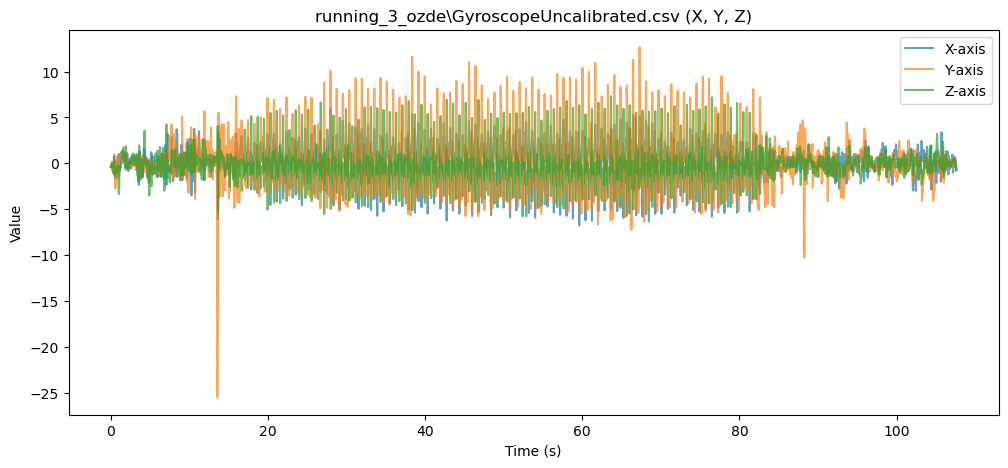

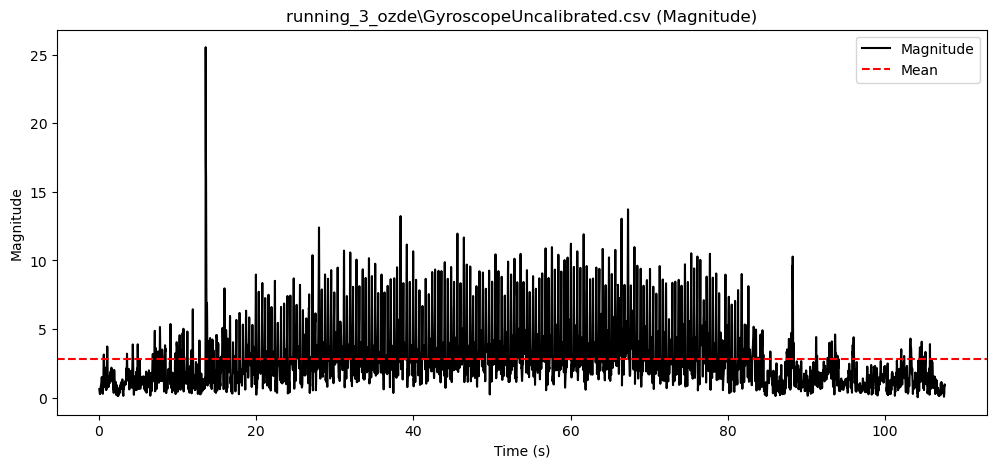

Skipping running_3_ozde\Metadata.csv: missing required columns


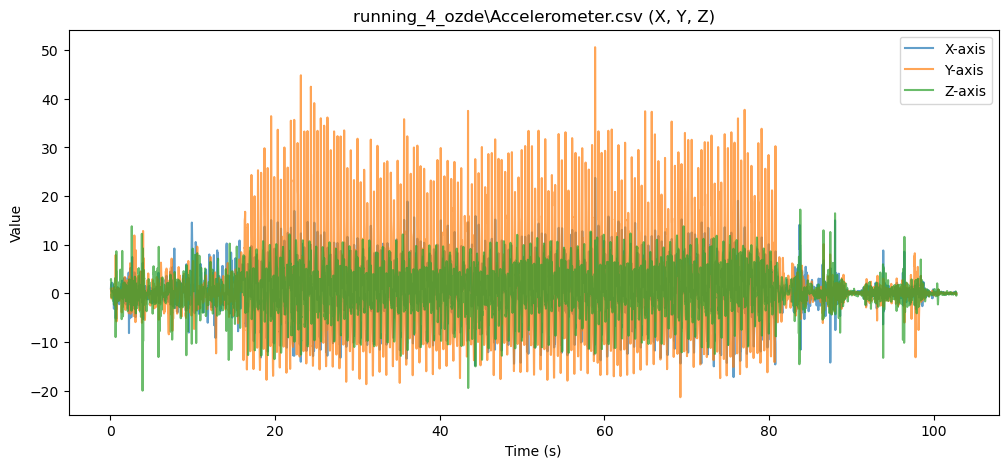

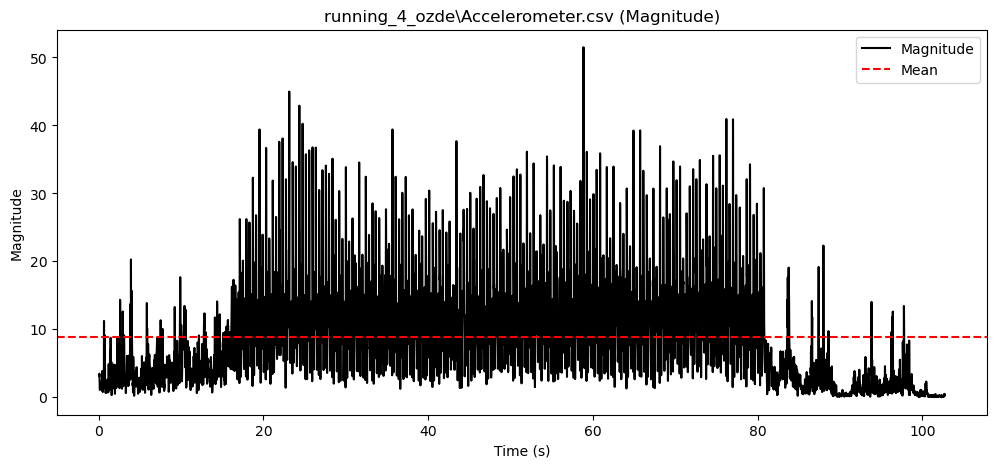

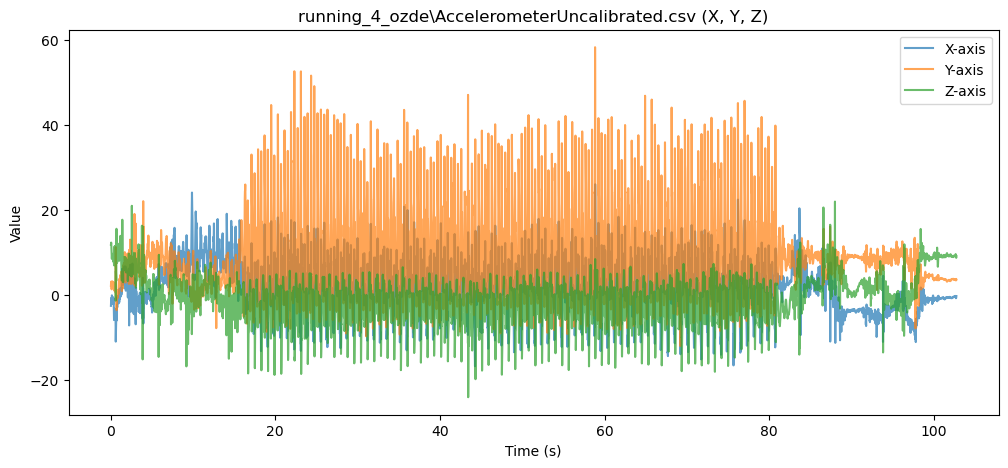

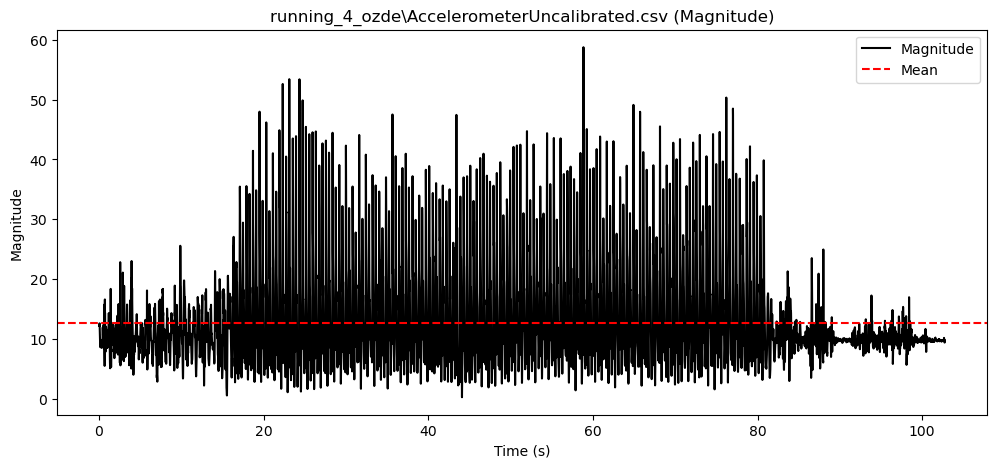

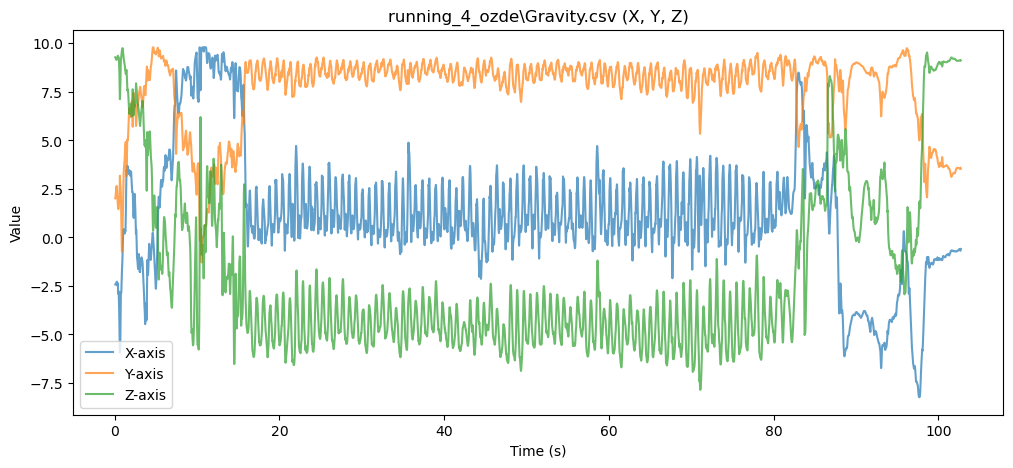

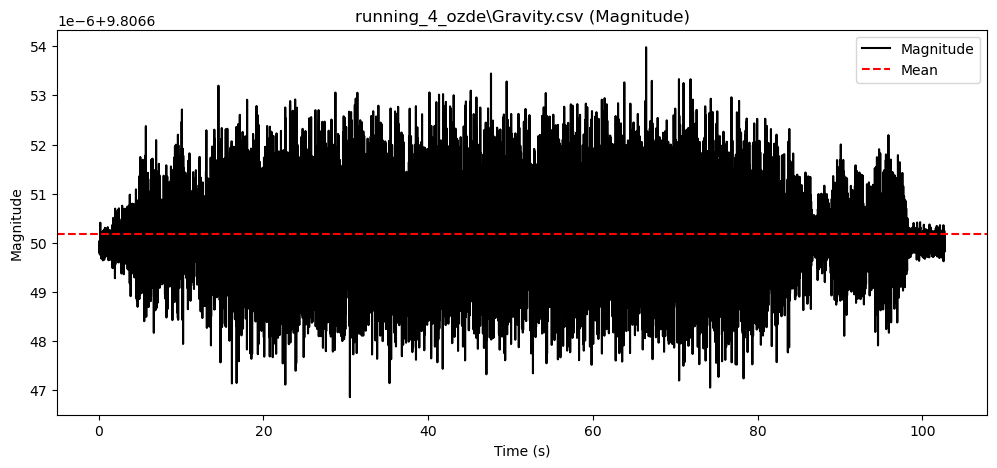

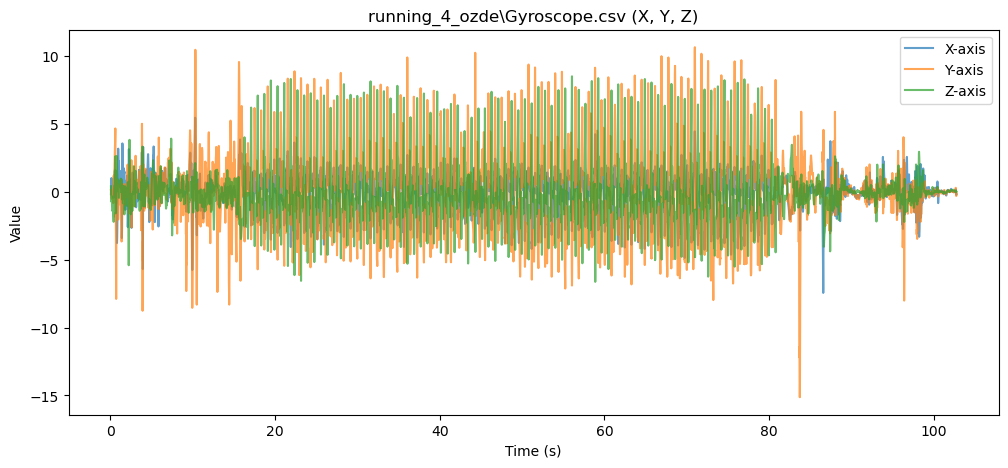

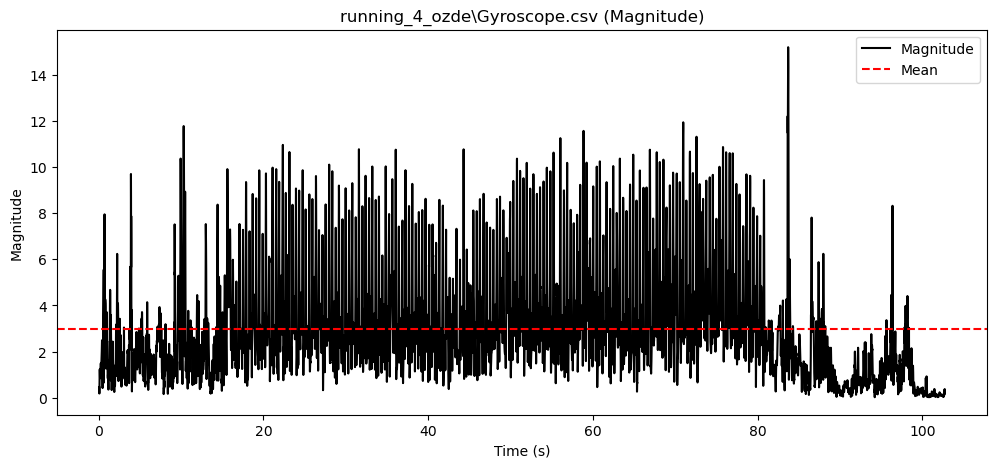

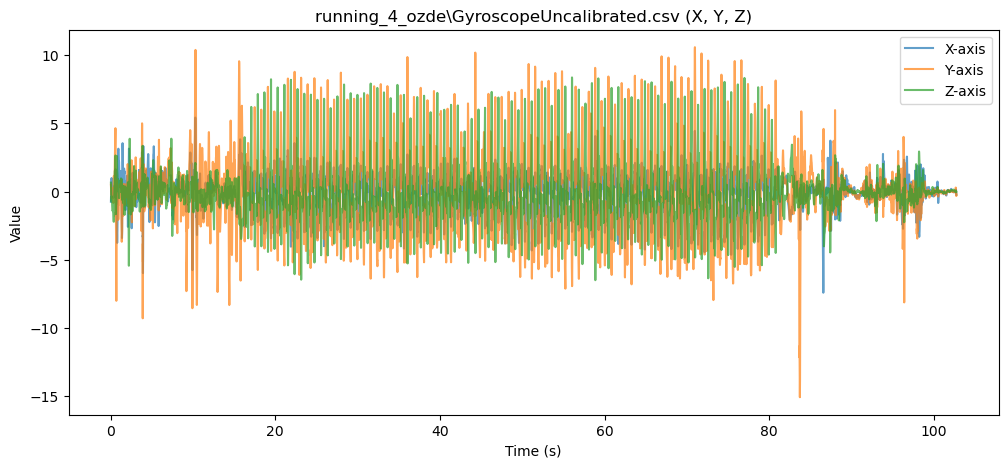

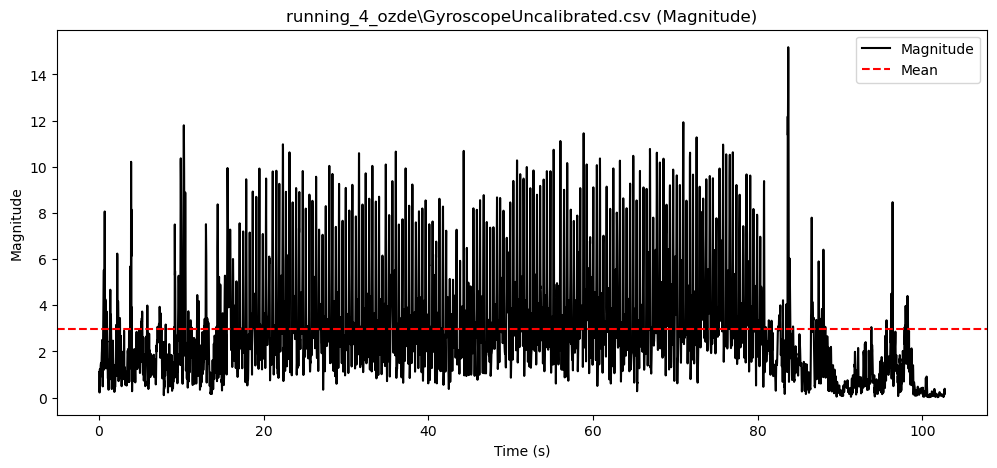

Skipping running_4_ozde\Metadata.csv: missing required columns


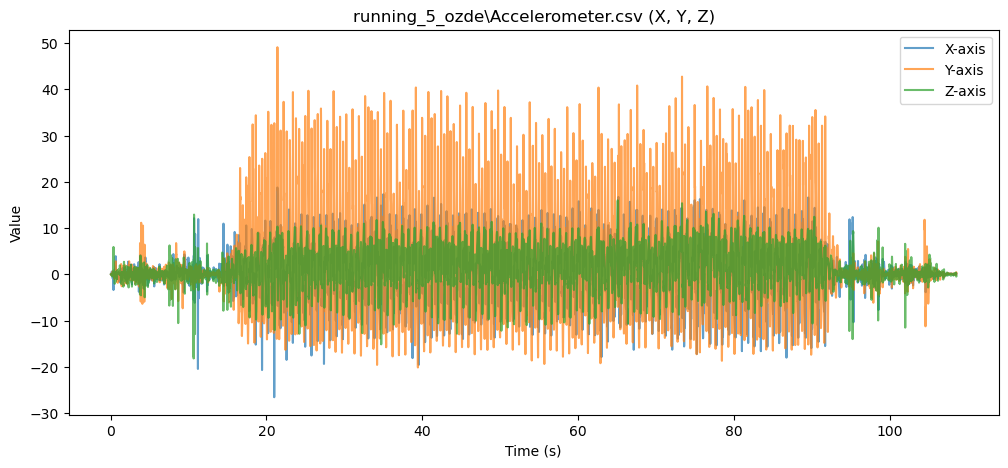

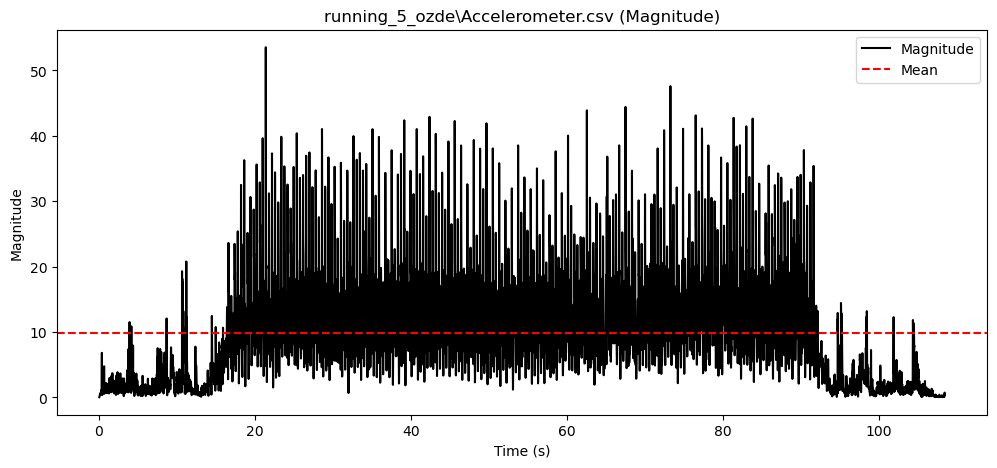

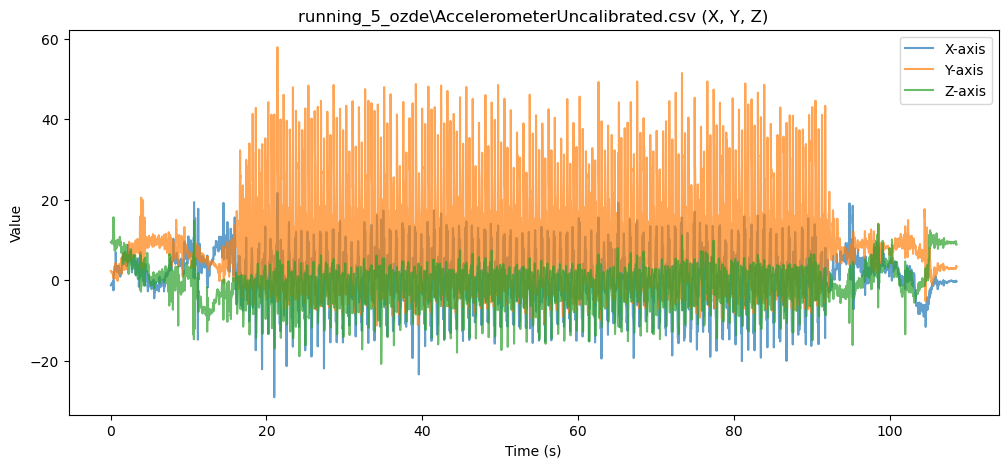

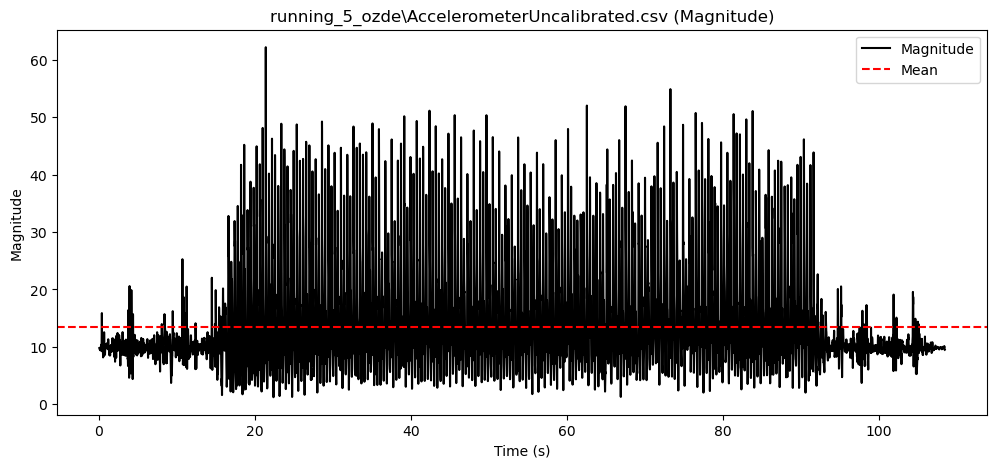

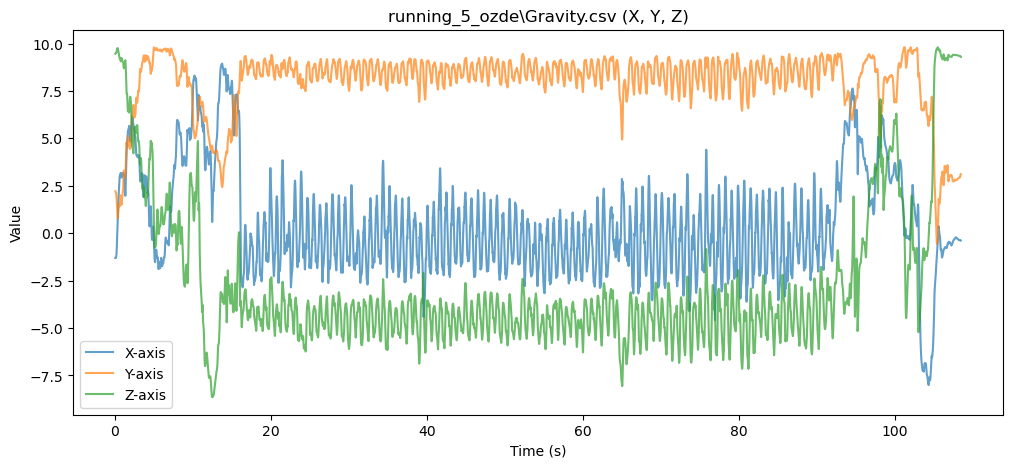

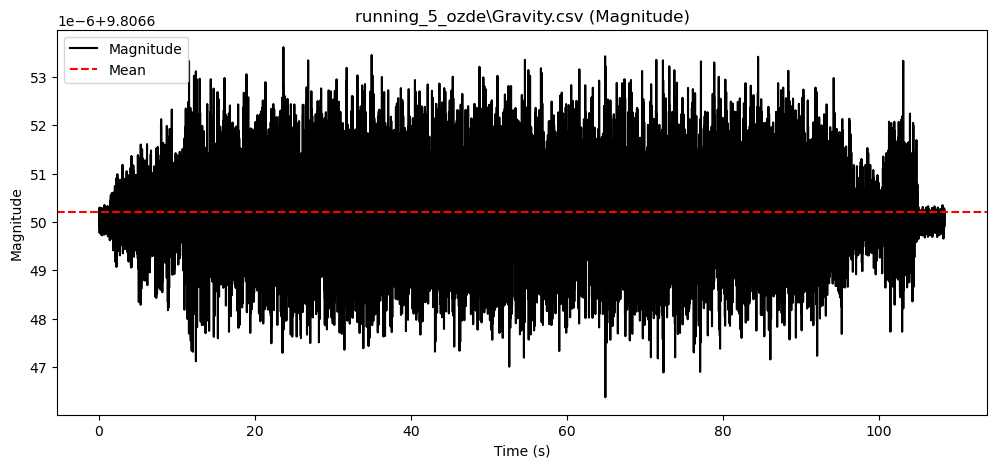

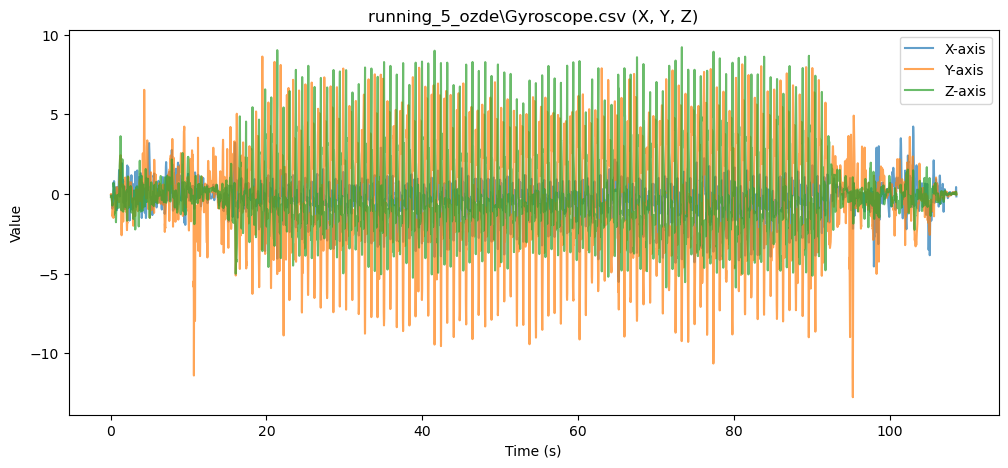

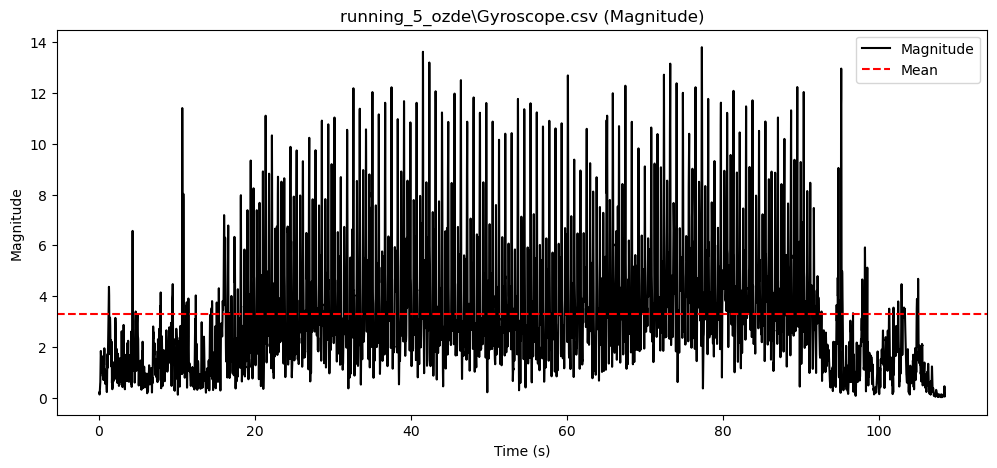

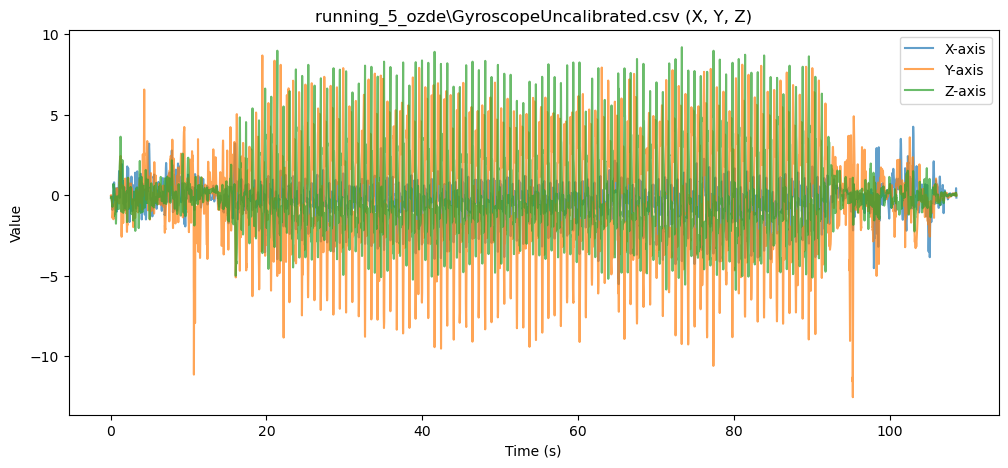

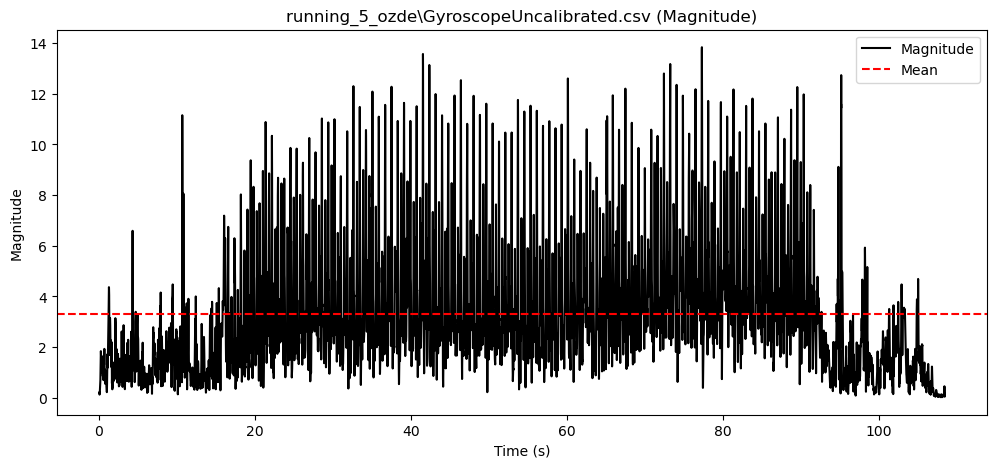

Skipping running_5_ozde\Metadata.csv: missing required columns


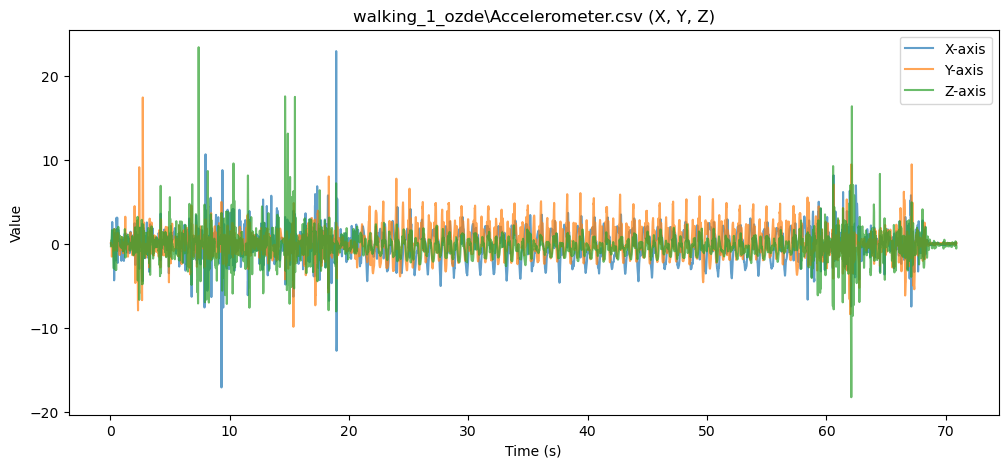

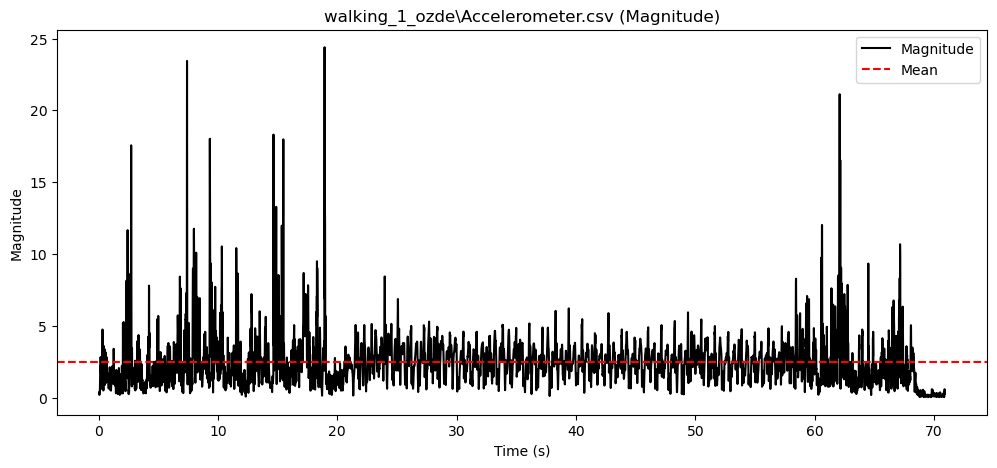

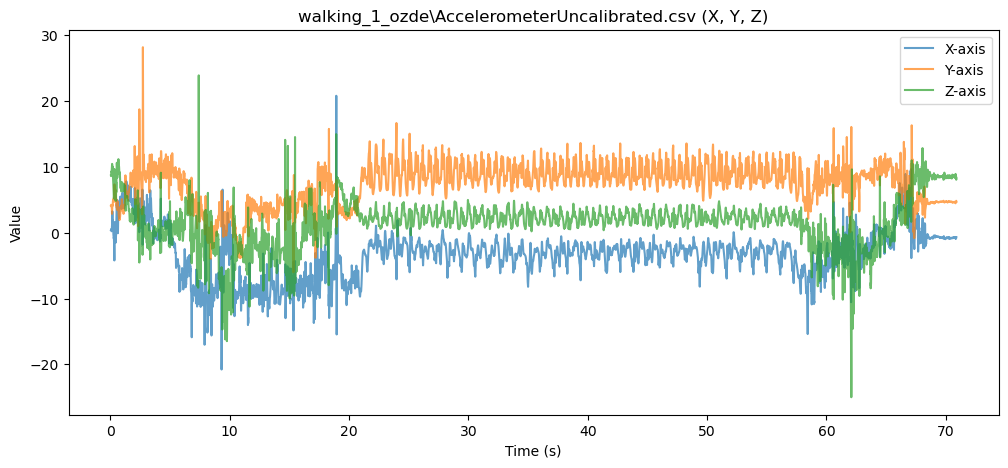

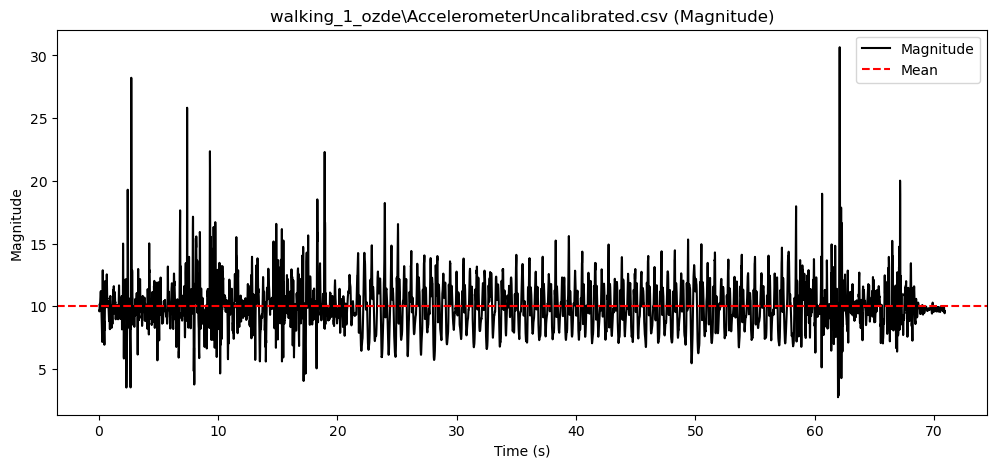

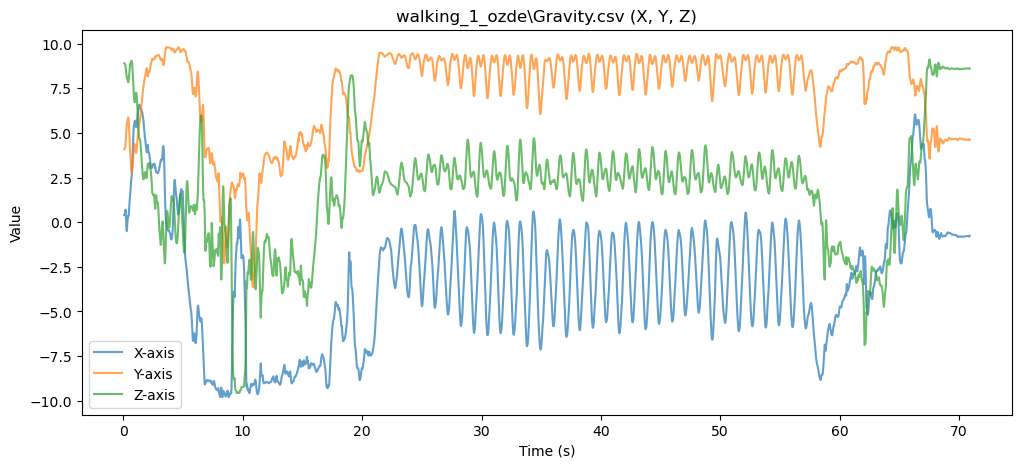

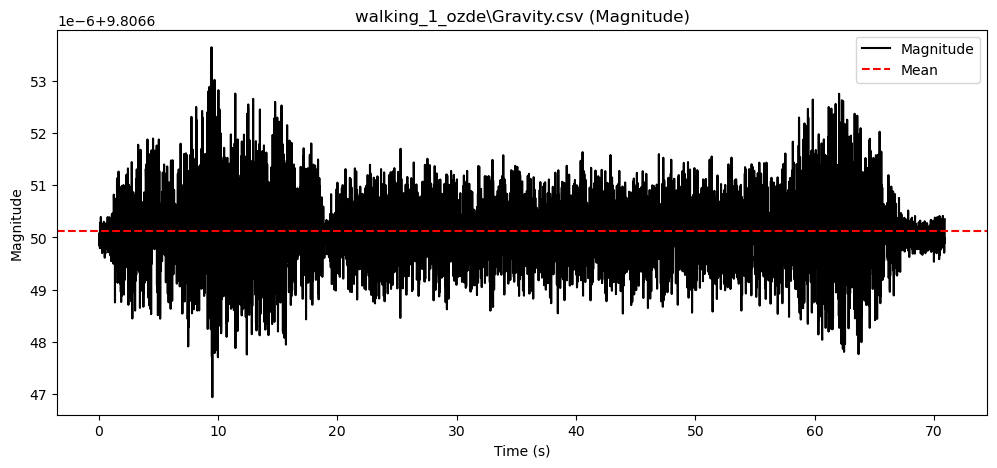

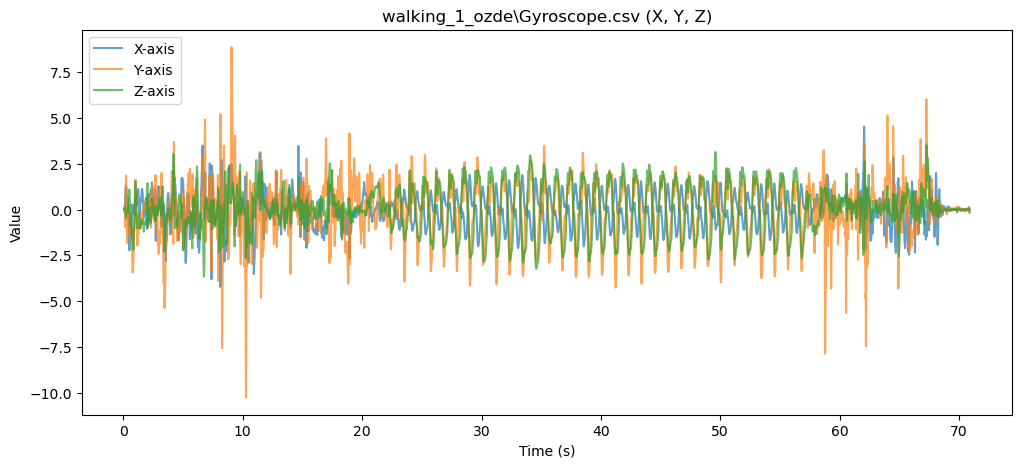

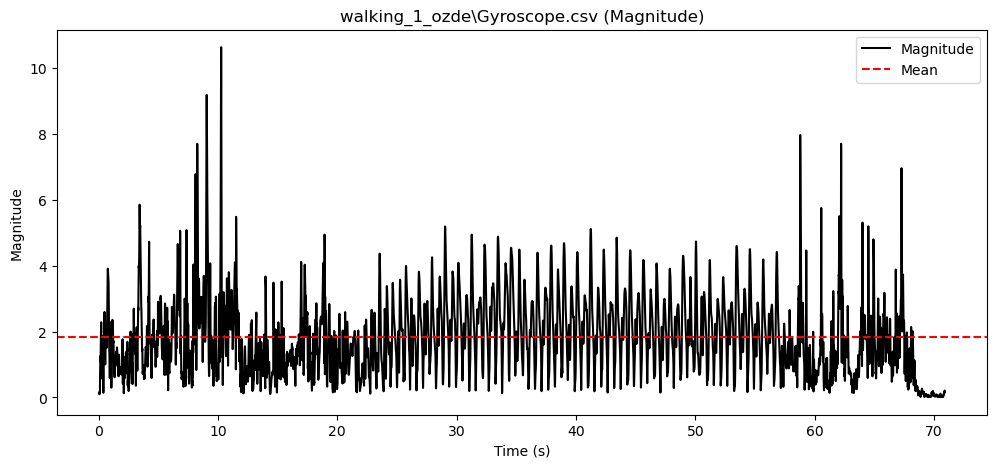

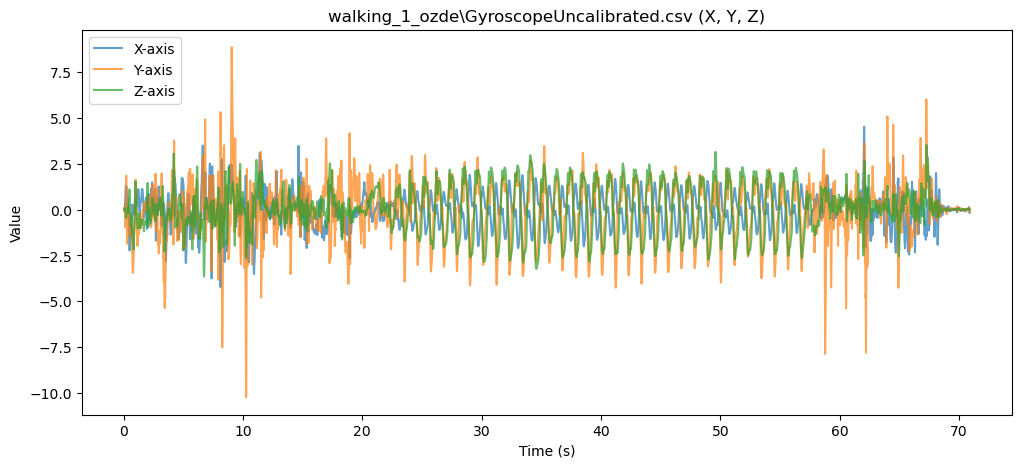

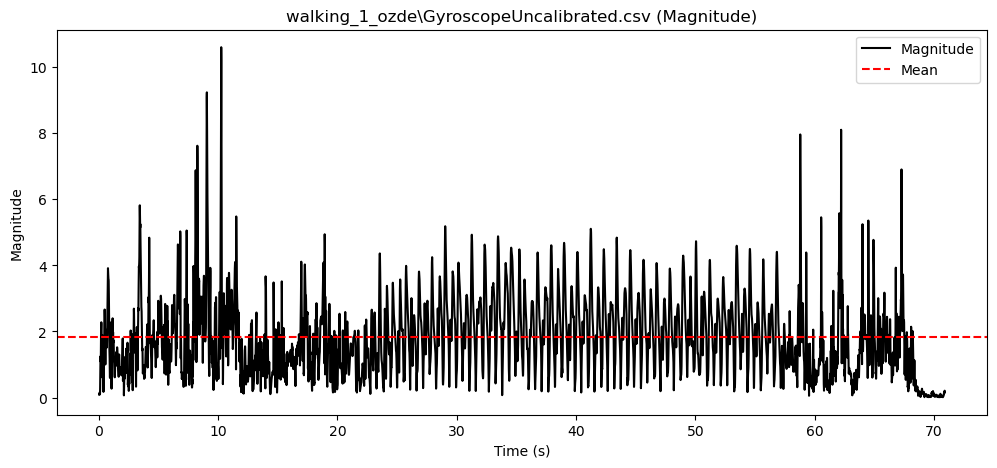

Skipping walking_1_ozde\Metadata.csv: missing required columns


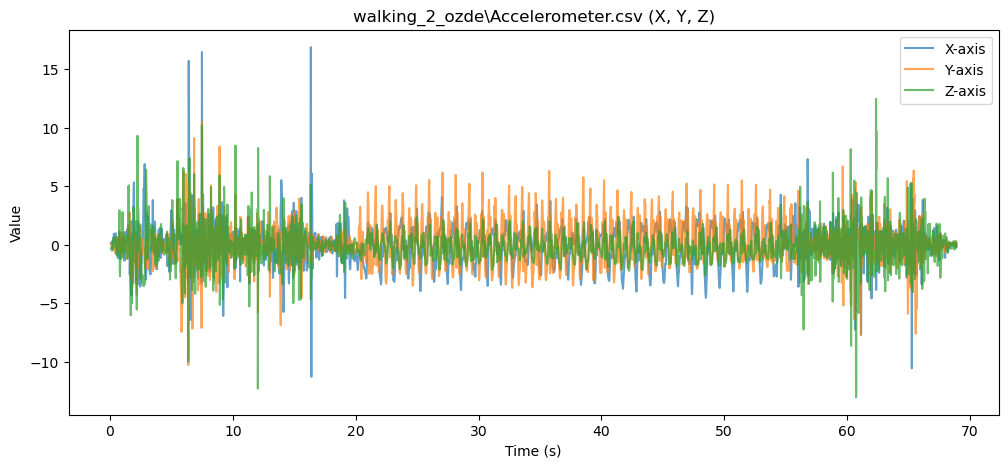

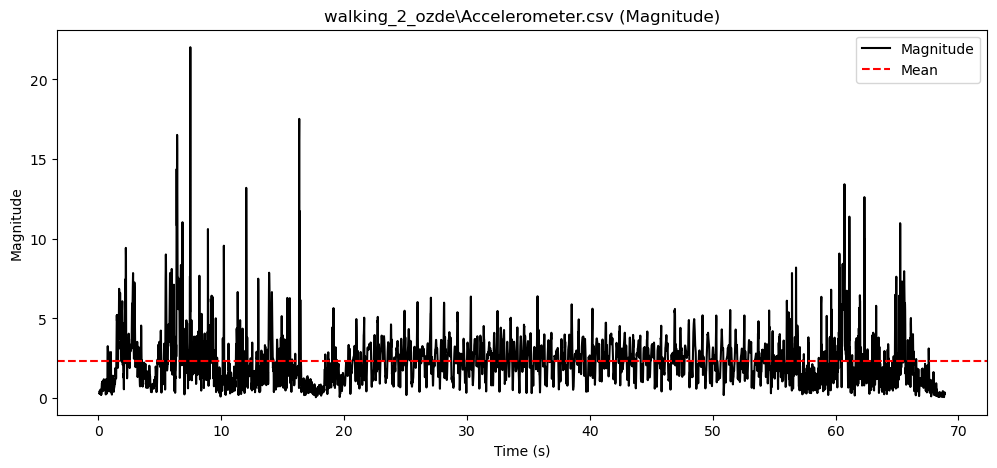

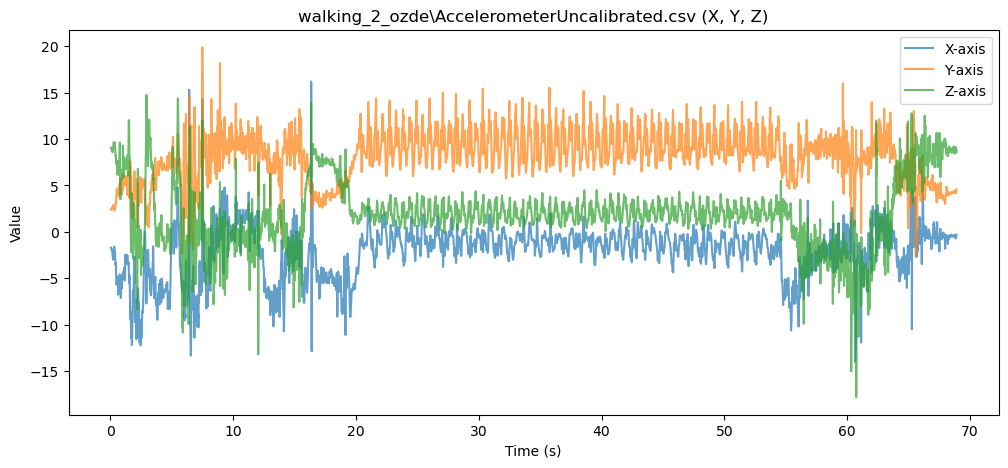

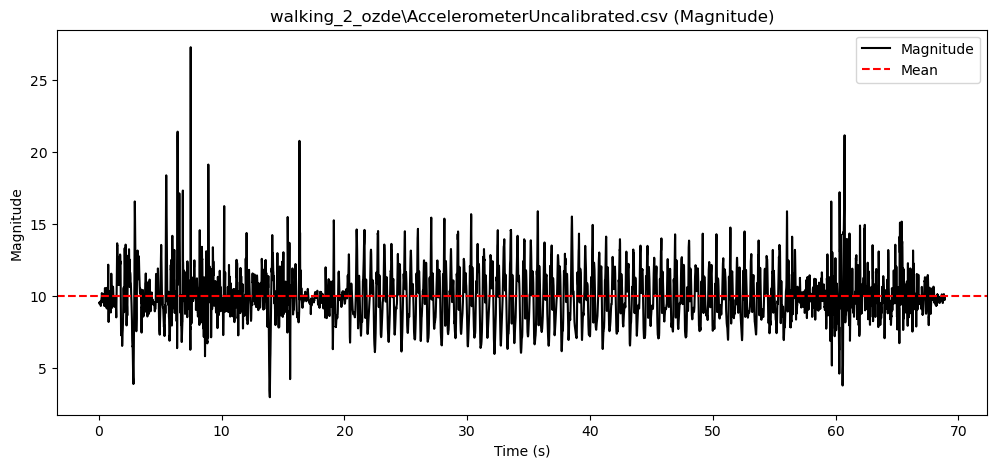

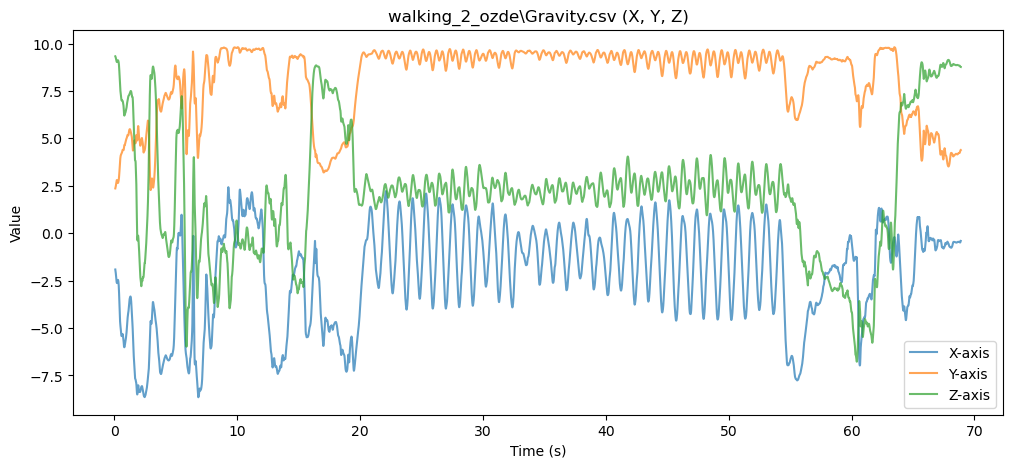

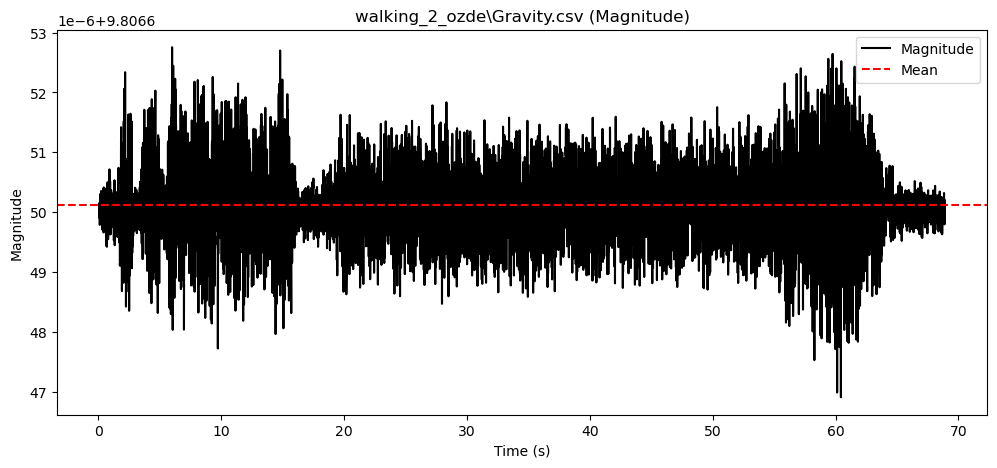

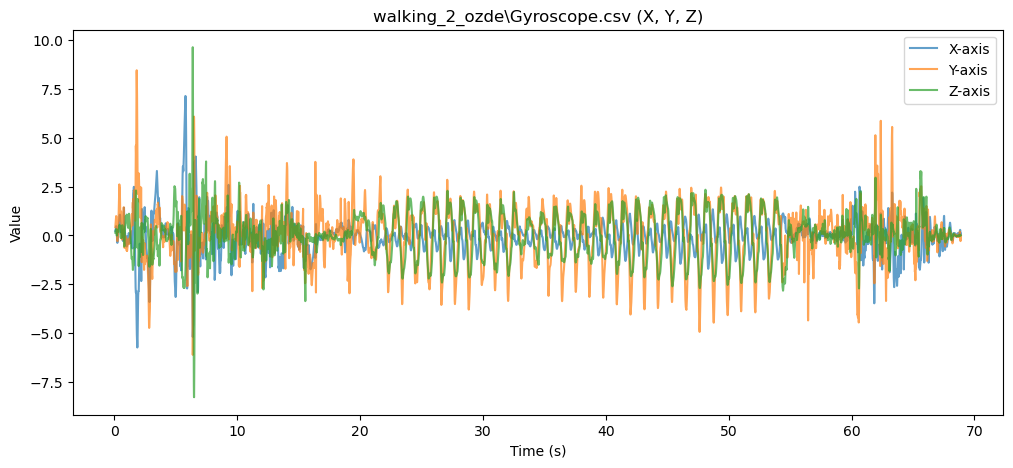

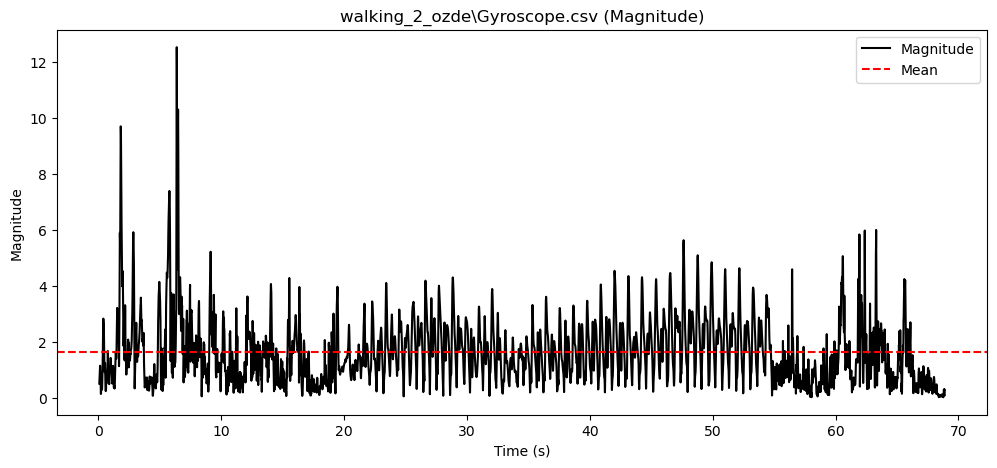

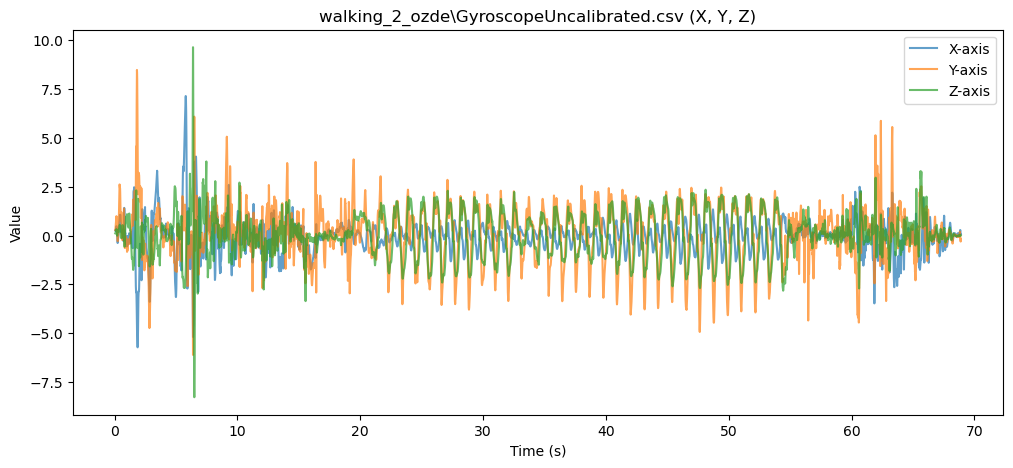

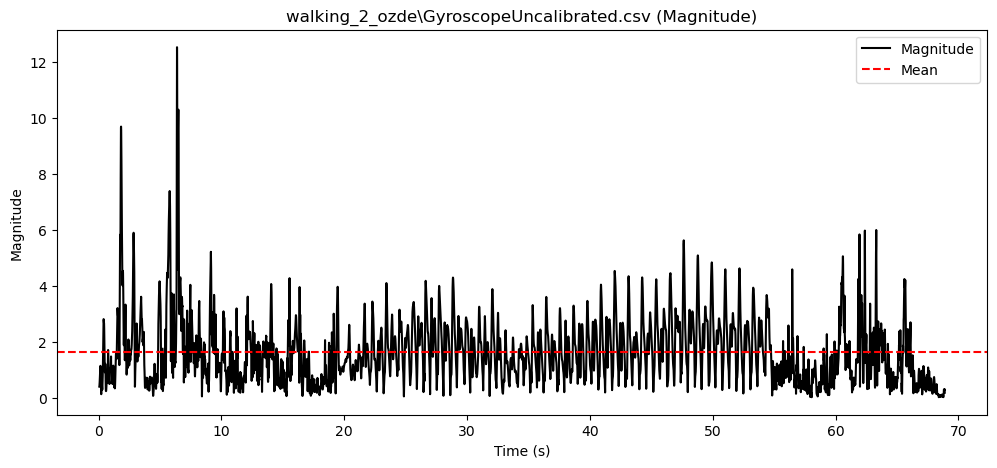

Skipping walking_2_ozde\Metadata.csv: missing required columns


In [20]:
def analyze_and_plot(datasets):
    for name, df in datasets.items():
        # Only process files with x,y,z
        if not {"seconds_elapsed", "x", "y", "z"}.issubset(df.columns):
            print(f"Skipping {name}: missing required columns")
            continue

        # Compute magnitude
        df["magnitude"] = np.sqrt(df["x"]**2 + df["y"]**2 + df["z"]**2)

        # Plot X, Y, Z
        plt.figure(figsize=(12, 5))
        plt.plot(df["seconds_elapsed"], df["x"], label="X-axis", alpha=0.7)
        plt.plot(df["seconds_elapsed"], df["y"], label="Y-axis", alpha=0.7)
        plt.plot(df["seconds_elapsed"], df["z"], label="Z-axis", alpha=0.7)
        plt.title(f"{name} (X, Y, Z)")
        plt.xlabel("Time (s)")
        plt.ylabel("Value")
        plt.legend()
        plt.show()

        # Plot Magnitude
        plt.figure(figsize=(12, 5))
        plt.plot(df["seconds_elapsed"], df["magnitude"], label="Magnitude", color="black")
        plt.axhline(y=df["magnitude"].mean(), color="r", linestyle="--", label="Mean")
        plt.title(f"{name} (Magnitude)")
        plt.xlabel("Time (s)")
        plt.ylabel("Magnitude")
        plt.legend()
        plt.show()


if __name__ == "__main__":
    datasets = load_data()
    for name, df in datasets.items():
        print(f"Loaded {name} with shape {df.shape}")
    analyze_and_plot(datasets)
